In [9]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import pickle
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import dates

%matplotlib inline

#https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
#2 spaces - new line

## First Look at the Data

In [10]:
df_cal = pd.read_csv('data/calendar.csv')
df_rev = pd.read_csv('data/reviews.csv')

#Focus on listings first
df_lis = pd.read_csv('data/listings.csv')

datas = [df_cal,df_rev,df_lis]
for data in datas:
    print(data.shape[1],"columns and",data.shape[0],"rows.")
    print("Columns:")
    print(data.columns.tolist())
    print(data.head(3),"\n")
print(df_lis.info(verbose=False))

4 columns and 1393570 rows.
Columns:
['listing_id', 'date', 'available', 'price']
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN 

6 columns and 84849 rows.
Columns:
['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...   

92 columns and 3818 rows.
Columns:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_off

After taking a quick look at the three datasets I decided to focus on listings first as it contains the most amount of information. 

## Checking for missing values and uniques values counts

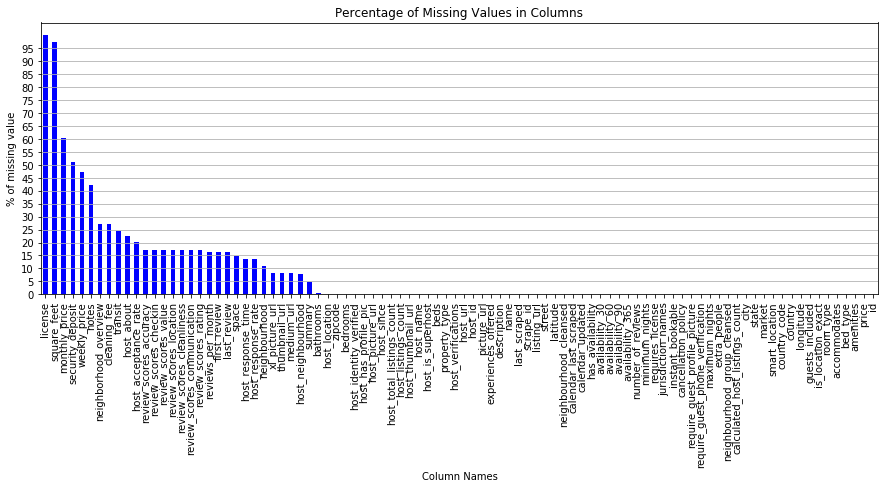

license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
reviews_per_month               16.422211
first_review                    16.422211
dtype: float64
47  columns have no missing data out of  92 .These columns are : -  ['host_verifications', 'host_url', 'host_id', 'picture_url', 'experiences_off

In [11]:
#NANS

df_lis_nan = (df_lis.isnull().sum(axis=0)/df_lis.shape[0]*100).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
df_lis_nan.plot(kind='bar',color='blue')
plt.xlabel('Column Names')
plt.ylabel('% of missing value')
plt.grid(axis='y')
plt.title('Percentage of Missing Values in Columns')
plt.yticks(np.arange(0,100,5))
plt.show()


print(df_lis_nan.head(n=20))
print(len(df_lis_nan[df_lis_nan==0].index), " columns have no missing data out of ", df_lis.shape[1],
       ".These columns are : - " ,
       df_lis_nan[df_lis_nan==0].index.tolist())

#Dropping columns with over 20% missing values
nan_lis_to_drop = df_lis_nan[df_lis_nan>20].index.tolist() 
df_lis.drop(nan_lis_to_drop,axis=1,inplace=True)

Dropping columns with over 20% missing values : -

- license                        100.000000  
- square_feet                     97.459403  
- monthly_price                   60.267156  
- security_deposit                51.126244  
- weekly_price                    47.380828  
- notes                           42.063908  
- neighborhood_overview           27.029859  
- cleaning_fee                    26.977475  
- transit                         24.463070  
- host_about                      22.498690  
- host_acceptance_rate            20.246202 

In [12]:
#UNIQUE

df_lis_uni = sorted(df_lis.nunique().to_dict().items(),key=operator.itemgetter(1))

uni_lis_to_drop = []
uni_lis_to_binarise = [] 

for key, value in df_lis_uni: 
    #print('{}:{}'.format(key,value))
    if(value == 1): #drop column if all its rows have only one value
        print("One Value:", key, df_lis[key].unique())
        uni_lis_to_drop.append(key)
    elif(value == 2):
        print("Binary Check:", key, df_lis[key].unique())
        uni_lis_to_binarise.append(key)
    elif(value==df_lis.shape[0]): #drop column if it has unique value in every row
        uni_lis_to_drop.append(key)
    
# Remove the one with only one value or all unique values
uni_lis_to_binarise.remove("state")
uni_lis_to_drop.append("state")
uni_lis_to_drop.remove("id")

print('\nContains single or all unique values: ',uni_lis_to_drop)
print('\nContains binary values',uni_lis_to_binarise)

df_lis.drop(uni_lis_to_drop,axis=1,inplace=True)

#Further values ot drop
#Looking into city
print(pd.unique(df_lis.city))
print(df_lis.city.value_counts())
#ballard - 1, west seattle - 2, phinney ride 1. Rest all seattle even smart location
df_lis.drop(['city','smart_location'],axis=1,inplace=True)

One Value: scrape_id [20160104002432]
One Value: last_scraped ['2016-01-04']
One Value: experiences_offered ['none']
One Value: market ['Seattle']
One Value: country_code ['US']
One Value: country ['United States']
One Value: has_availability ['t']
One Value: calendar_last_scraped ['2016-01-04']
One Value: requires_license ['f']
One Value: jurisdiction_names ['WASHINGTON']
Binary Check: host_is_superhost ['f' 't' nan]
Binary Check: host_has_profile_pic ['t' 'f' nan]
Binary Check: host_identity_verified ['t' 'f' nan]
Binary Check: state ['WA' 'wa']
Binary Check: is_location_exact ['t' 'f']
Binary Check: instant_bookable ['f' 't']
Binary Check: require_guest_profile_picture ['f' 't']
Binary Check: require_guest_phone_verification ['f' 't']

Contains single or all unique values:  ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names', 'listing_url', 'picture_url', 'lati

Columns which contain only one value tell us nothing about the data so it can be removed. Similarily, columns which have a different value for every row - like an identifier also explains nothing. 

From the variables to be binarised I have removed state column. state contains two values WA and wa which both stand for Washington - so it is essentially a column with only one value.

The columns with single value being removed are :- 

['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names','listing_url', 'picture_url', 'latitude', 'longitude', 'state']
#I have removed id as it corresponds to listings_id in the other data frame.

Also, city column is not useful as its values are mostly different names for Seattle with exceptions of a few rows mentioning a more specific location. 

### Q1: Are there any zipcodes where AirBnBs are priced higher than others? If yes, why are these locations prime? 

Minimum priced AirBnB:  20.0
Maximum priced AirBnB:  1000.0


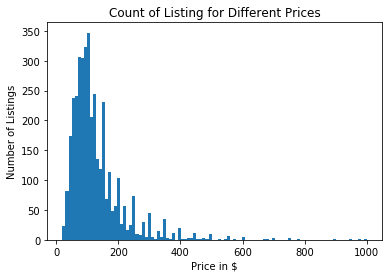

In [13]:
#Convert price to a number
df_lis.price = df_lis.price.apply(lambda x: float(x[1:].replace(",","")))
print('Minimum priced AirBnB: ' , df_lis.price.sort_values().min())
print('Maximum priced AirBnB: ' ,df_lis.price.sort_values().max())

ax = df_lis['price'].hist(bins=100)
plt.title('Count of Listing for Different Prices')
plt.xlabel('Price in $')
plt.ylabel('Number of Listings')
plt.grid(False)
plt.show()

AirBnB prices range between \$20 to \$1000 but most are below \$200. 

C:\Users\nasehgal\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


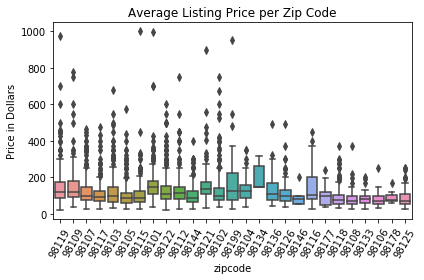

zipcode
98134    206.600000
98199    172.393939
98101    166.721393
98119    166.377622
98121    153.785714
98109    150.247525
98116    145.348214
98136    137.909091
98112    135.437126
98104    135.221053
98122    132.492857
98107    130.238889
98102    127.103245
98103    124.149746
98126    122.730159
98115    112.129213
98117    111.262195
98105    107.111111
98144    105.395000
98177     98.842105
98146     97.800000
98178     94.428571
98118     93.798701
98125     88.577465
98133     86.282609
98108     83.875000
98106     82.103448
Name: price, dtype: float64
Top 5 zipcode
98134    206.600000
98199    172.393939
98101    166.721393
98119    166.377622
98121    153.785714
Name: price, dtype: float64
Bottom 3 zipcode
98133    86.282609
98108    83.875000
98106    82.103448
Name: price, dtype: float64


In [14]:
df_lis = df_lis[df_lis.zipcode!='99\n98122'] #invalid
zip_group = df_lis.groupby('zipcode') 
#format upto 2 places


fig, ax = plt.subplots(1, 1, tight_layout=True)
ax = sns.boxplot(x="zipcode", y='price', data=df_lis)
plt.title("Average Listing Price per Zip Code")
plt.ylabel("Price in Dollars")
plt.xticks(rotation=60)
plt.show()
#plt.savefig("4.png")
print(zip_group['price'].mean().sort_values(ascending=False)) 


print("Top 5", zip_group['price'].mean().sort_values(ascending=False).head(n=5)) #iloc[np.r_[0:2, -2:0]])

print("Bottom 3", zip_group['price'].mean().sort_values(ascending=False).tail(n=3))

### Answer 1 

**Yes, the area which has the Safeco Field (baseball park) clearly stands out as the zipcode with the most expensive area, followed by Magnolia and areas in/near Downtown Seattle. **

#### In Depth: 

If we look at the areas with most expensive average prices - 

1. **98134 (\$206)** : This zipcode stands out in particular. Safeco Field (baseball park) is located here, so there is a lot of money to make near the stadium. 

The next few zipcodes are near downtown. The top attractions of Seattle such as Space Needle, Seattle Centre etc. are easily accessible from here. 

2. **98199 (\$172.39)** : Magnolia - Access to one of the most expensive parks of Seattle - Discovery Park - which contains beaches and forests. Upscale shops and cafes, and farmers’ markets make this an expensive place. 

3. **98101 (\$166.37)** : In Downtown Seattle, this has the Washington State convention center. This is the spot for premier meetings/conferences or events such as comic cons. Let's explore if there is a correlation between business and major events. 

4. **98119 (\$166.72)** : Queen Anne is directly north of Downtown. Queen Anne Avenue hosts many events such as Seattle International Film Festival. Seattle Centre is here as well.  

Now if we look at the cheapest zipcodes for AirBnB's- 

1. **98106 (\$82.10)** : Highland Park is a traditionally a working-class neighborhood, due to its proximity to the Industrial District. It's likely people come here for work over other reasons.

2. **98108 (\$83.87)** : South Park is a highly polluted industrial area. Additionally, the crime rate here is 187% higher than the national average, making it the most dangerous neighborhood in Seattle. Property values here are lower than other places in Seattle. 

3. **98125 (\$86.28)** : Lake City is far South (7-8 km away from downtown). It is more of a residential area which consists of many retirees.

### Q2. Is there any particular event/season where AirBnBs are priced higher? 

Number of listings:  3723
Price variations:- 


C:\Users\nasehgal\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nasehgal\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


        listing_id        date available  price  diff
790605        5682  2016-01-19         t   49.0  -1.0
790612        5682  2016-01-26         t   50.0   1.0
790626        5682  2016-02-09         t   42.0  -8.0
790627        5682  2016-02-10         t   55.0  13.0
790628        5682  2016-02-11         t   54.0  -1.0
        listing_id        date available  price  diff
137609        6606  2016-01-08         t  100.0  10.0
137611        6606  2016-01-10         t   90.0 -10.0
137616        6606  2016-01-15         t  100.0  10.0
137618        6606  2016-01-17         t   90.0 -10.0
137623        6606  2016-01-22         t  100.0  10.0
         listing_id        date available  price  diff
1270316        9419  2016-04-29         t  100.0  30.0
1270318        9419  2016-05-01         t   90.0 -10.0
1270323        9419  2016-05-06         t  100.0  10.0
1270325        9419  2016-05-08         t   90.0 -10.0
1270330        9419  2016-05-13         t  100.0  10.0
        listing_id    

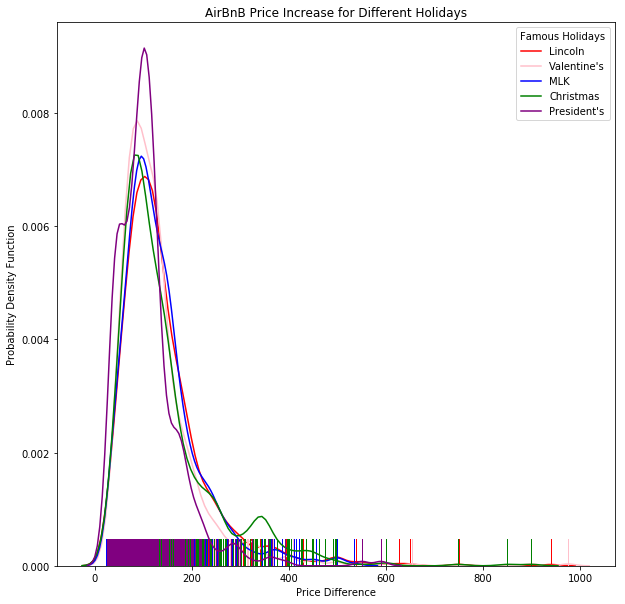

In [31]:
df_cal.dropna(subset=['price'],inplace=True)
df_cal.price = df_cal.price.apply(lambda x: float(x[1:].replace(",","")))

df_cal_id_group = df_cal.sort_values(['listing_id','date']).groupby('listing_id')
print("Number of listings: ", len(df_cal_id_group.groups.keys()))
print("Price variations:- ")

count = 0
mlk_lis = []
vd_lis = []
lin_lis = []
ch_lis = []
pd_lis = []

for i in df_cal_id_group.groups.keys():
    #dont break now
    b = df_cal[df_cal.listing_id == i]
    b['diff'] = b.price.diff()
    b.dropna(subset=['diff'],inplace=True)
    b = b.loc[~b['diff'].isin([0])]
    if(b.empty):
        continue 
        
    count +=1
    if count < 20:
        print(b.head(5))
   
    #MLK
    mlk = b[b.date=='2016-01-15'].price.tolist()
    if(len(mlk)>0):
        mlk_lis.append(mlk[0])
    #VD
    vd = b[(b.date=='2016-02-14')].price.tolist()
    if(len(vd)>0):
        vd_lis.append(vd[0])
    #LIN
    lin = b[(b.date=='2016-02-12')].price.tolist()
    if(len(lin)>0):
        lin_lis.append(lin[0])
    #CH
    ch = b[(b.date=='2016-12-25')].price.tolist()
    if(len(ch)>0):
        ch_lis.append(ch[0])
        
    #PD
    pd = b[(b.date=='2016-02-15')].price.tolist()
    if(len(pd)>0):
        pd_lis.append(pd[0])

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.distplot(lin_lis,hist=False,rug=True,color='red',label="Lincoln")
ax = sns.distplot(vd_lis,hist=False,rug=True,color='pink',label="Valentine's")
ax = sns.distplot(mlk_lis,hist=False,rug=True,color='blue', label="MLK")
ax = sns.distplot(ch_lis,hist=False,rug=True,color='green',label="Christmas")
ax = sns.distplot(pd_lis,hist=False,rug=True,color='purple',label="President's")

plt.title('AirBnB Price Increase for Different Holidays')
plt.legend(title='Famous Holidays')
plt.xlabel('Price Difference')
plt.ylabel('Probability Density Function')
plt.show()

### Ans 2.1 - Weekends and Popular Holidays

At first look, we can see that many AirBnB's increase their price on Friday and decrease it on Sunday - keeping it constant the rest of the week. 

Prices on holidays are naturally higher. Valentines Day and President's Day appear to be popular holidays - which fall on consecutive days (14/02/16 Sunday, 15/02/16 Monday). There are some exorbitant price hikes observed on Christmas.

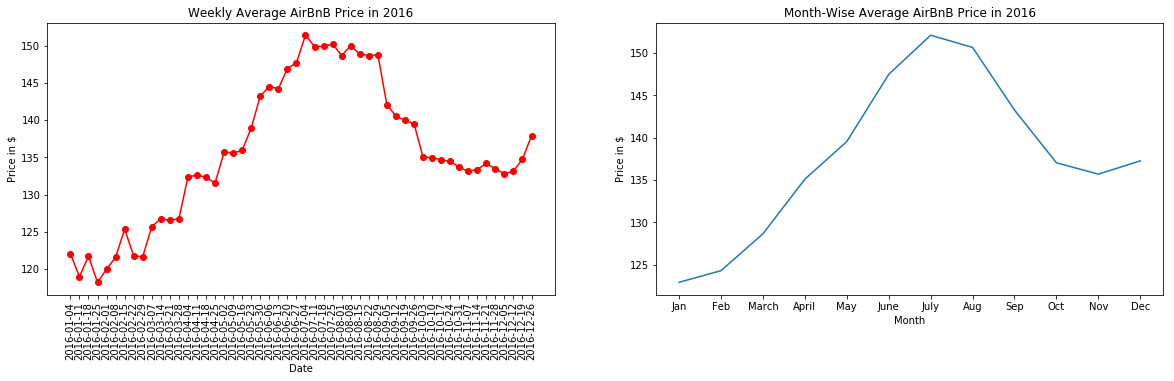

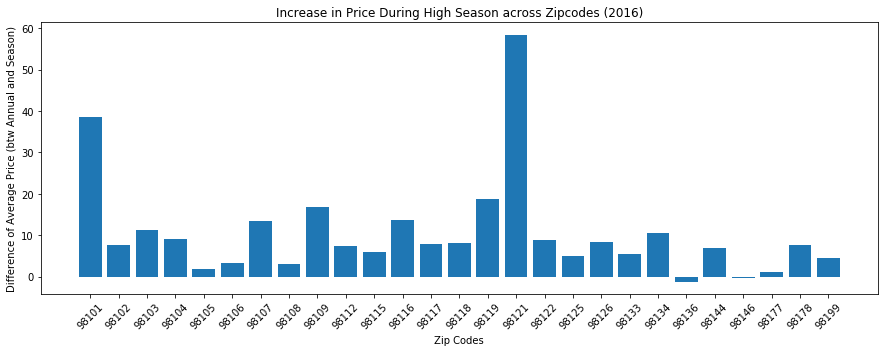

In [34]:
def getMonth(x):
    x = x.split('-')
    return int(x[1])

date_groups = df_cal.groupby('date').price.mean()
inds = date_groups.index.tolist()
i = 0
dates, values = [],[]

while(1):
    if(i < len(inds)):
        dates.append(inds[i])
        values.append(date_groups.values[i])
    else:
        break
    i += 7
dates.pop()
values.pop()

fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.plot_date(dates,values,'ro-')
plt.title('Weekly Average AirBnB Price in 2016')
plt.xlabel('Date')
plt.ylabel('Price in $')

plt.subplot(1, 2, 2)
df_cal['month'] = df_cal.date.apply(getMonth)
month_groups = df_cal.groupby('month').price.mean()
plt.xticks(np.arange(1,13,1),('Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'))
plt.plot(month_groups)
plt.title('Month-Wise Average AirBnB Price in 2016')
plt.xlabel('Month')
plt.ylabel('Price in $')
plt.savefig("Fig7.png")
#plt.show()


#check with overall
avg_price_overall_whole = df_cal.price.mean() #average price
#check with seasonal
avg_price_seasonal_whole = df_cal[(df_cal['month'] >= 6)& (df_cal['month'] < 9)].price.mean()


zip_group = df_lis.groupby('zipcode')

overall_avg_price_dict = dict()
seasonal_avg_price_dict = dict()
for i in zip_group.groups.keys(): #one type of zipcode
    listings = df_lis[df_lis.zipcode==i].id.tolist()
    overall_avg_price_dict[i] = df_cal[df_cal['listing_id'].isin(listings)]['price'].mean() #df_new[df_new['l_ext'].isin([31, 22, 30, 25, 64])]
    seasonal_avg_price_dict[i] = df_cal[(df_cal['listing_id'].isin(listings)) & (df_cal['month'] >= 6)& (df_cal['month'] < 9)]['price'].mean()

fig = plt.figure(figsize=(15,5))
plt.bar(range(len(overall_avg_price_dict)), [a - b for a, b in zip(list(seasonal_avg_price_dict.values()),list(overall_avg_price_dict.values()))], align='center')
plt.xticks(range(len(overall_avg_price_dict)), list(overall_avg_price_dict.keys()))
plt.xticks(rotation=45)
plt.xlabel('Zip Codes')
plt.ylabel('Difference of Average Price (btw Annual and Season)')
plt.title('Increase in Price During High Season across Zipcodes (2016)')
#plt.show()
plt.savefig("Fig8.png")

### Ans 2.2 - Popular Seasons 

If we look at the weekly and month-wise average AirBnB prices we can see that the prices are high between June and August then dip down again at September.These winter prices are still higher than spring prices though. 

June-August is infact high season in Seattle. The weather is sunny, dry and war, with low humdity. This is the cruise ship season and tourists as well as locals head out for local music and arts festivals. 

Lets take a look at the zipcodes that price higher in the high seasons : - 
1. 98121 is 5th on the list of highest zipcode average pricing. It is a neighbourhood in Downtown Seattle, which is one of the most popular tourist destinations. 
2. 98101 is the zipcode holding the Washington State Convention Center
3. 98119 hosted the Seattle International Film Festival from May 19, 2016 to June 12, 2016

Now that we know the best place and season to host a listing we can see what type of listings are the most profitable.

## Further Processing 

In [16]:
def percentToNum(x):
    x = x[:-1]
    return int(x)
def boolToNum(x):
    if(x=='t'):
        return 1
    return 0

for_lis = df_lis

#drop rows/columns
for_lis = for_lis.drop(columns=['id','host_id','name','summary','space','description',
                                   'host_neighbourhood','host_name','host_url','host_location','host_since',
                               'calculated_host_listings_count','host_total_listings_count',
                               'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed'
                               ])

for_lis.dropna(subset=['zipcode'],inplace=True)

#fill available - %30,60,90,365
lis_days = ['availability_30','availability_60','availability_90','availability_365'] 
dict_days = {0:30,1:60,2:90,3:365}
for i in range(4):
    for_lis[(lis_days[i])].fillna(for_lis[(lis_days[i])].mean(),inplace=True)
    for_lis[lis_days[i]] = for_lis[lis_days[i]]/dict_days[i]

#fill rest
list_mode = ['host_response_rate','host_response_time',
            'require_guest_profile_picture','require_guest_phone_verification',
            'cancellation_policy',
            'review_scores_checkin','review_scores_communication','review_scores_location',
             'review_scores_value','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness']

list_mean = ['reviews_per_month']

for l in list_mode:
    for_lis[l].fillna(for_lis[l].mode()[0],inplace=True)
for l in list_mean:
    for_lis[l].fillna(for_lis[l].mean(),inplace=True)
    

#mappings
for_lis['host_response_time'] = for_lis['host_response_time'].map({'within an hour':1,
                                                                 'within a few hours':3,
                                                                  'within a day':24,
                                                                'a few days or more':60})
for_lis['cancellation_policy'] = for_lis['cancellation_policy'].map({'strict':0,
                                                                 'moderate':1,
                                                                  'flexible':2})

for_lis['host_response_rate'] = for_lis['host_response_rate'].apply(percentToNum)


bool_binarise = ['require_guest_profile_picture','require_guest_phone_verification','instant_bookable',
                 'host_is_superhost','host_has_profile_pic','host_identity_verified',
                 'is_location_exact']
for bb in bool_binarise:
    for_lis[bb] = for_lis[bb].apply(boolToNum)

null_binarise = ['thumbnail_url','medium_url','xl_picture_url','host_thumbnail_url','host_picture_url']
for nb in null_binarise:
    for_lis[nb]=for_lis[nb].map(lambda x: 0 if pd.isnull(x) else 1)

## Q3. What kind of listings are popular and/or priced the highest? 

                       amenity  count   avg_price
39                     Doorman     84  200.154762
36                        Pool    159  170.893082
22                     Hot Tub    303  167.029703
31         Suitable for Events    209  160.574163
35                         Gym    442  156.346154
1                     Cable TV   1444  155.210526
4             Air Conditioning    676  153.214497
23            Indoor Fireplace    883  151.943375
7          Family/Kid Friendly   1960  150.645918
18                Pets Allowed    470  147.521277
32        Elevator in Building    785  144.588535
34       Wheelchair Accessible    300  143.076667
0                           TV   2568  140.816589
15                 Safety Card    726  137.913223
11    Buzzer/Wireless Intercom    538  136.375465
10    Free Parking on Premises   2163  134.072584
9                        Dryer   2993  133.772135
8                       Washer   2988  133.623159
29                        Iron    741  133.079622


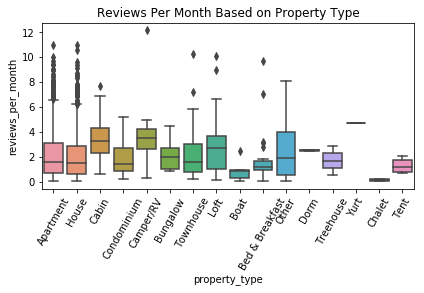

In [20]:
amenity_price = dict()
amenity_count = dict()

for row in for_lis.itertuples():
    amenities = row.amenities
    amenities = amenities[1:-1]
    #amenities = '[' + amenities + ']'
    amenities = amenities.split(',')
    for amenity in amenities :
        if(len(amenity)<2):
            continue
        if(amenity[0]=='"' and amenity[-1]=='"'):
            amenity = amenity[1:-1]
        try:
            amenity_count[amenity]+=1
            amenity_price[amenity].append(row.price)
        except:
            amenity_count[amenity] = 1
            amenity_price[amenity] = [row.price]

for key, value in amenity_price.items():
    amenity_price[key] = np.mean(value)

df_amenities = pd.DataFrame()
df_amenities['amenity'] = amenity_count.keys()
df_amenities['count'] = amenity_count.values()
df_amenities['avg_price'] = amenity_price.values()
              
#fig = plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
# ax = sns.boxplot(x="property_type", y="price", data=df_lis)
# plt.title("Average AirBnB Price Based on Property Type")
# plt.xticks(rotation=60)

# plt.subplot(1, 2, 2)
# ax = sns.boxplot(x="property_type", y='reviews_per_month', data=df_lis)
# plt.xticks(rotation=60)
# plt.tight_layout()
# plt.title("Reviews Per Month Based on Property Type")
# #plt.show()
# #plt.show()
# plt.savefig("Fig9.png")

fig = plt.figure()
#plt.subplot(1, 2, 1)
# ax = sns.boxplot(x="property_type", y="price", data=df_lis)
# plt.title("Average AirBnB Price Based on Property Type")
# plt.xticks(rotation=60)

# plt.subplot(1, 2, 2)
ax = sns.boxplot(x="property_type", y='reviews_per_month', data=df_lis)
plt.xticks(rotation=60)
plt.tight_layout()
plt.title("Reviews Per Month Based on Property Type")
plt.savefig("Fig9.2.png")


df_amenities.sort_values(by='avg_price',ascending=False,inplace=True)
print(df_amenities)

## Ans 3 -

Some observations about property types : - 
- We can observe that apartments and houses can be priced similarity and have similar average reviews per month. So a house is not needed for a succesful listing in Seattle.
- Boats can be priced high but don't get a lot of reviews.
- Tents are not that profitable as they're priced low and don't get more reviews per month.
- It is interesting to see that Camper/RV is a good alternative to traditional property types. It can be priced similar to bungalow and is more popular. 

Now if we take a look at the average price of listings when a particular amenity is present - 

- Doormans are present only in the top most AirBnBs. But they are expensive to keep for most hosts. 
- Pools and hot tubs lead next on the list. However, maybe the type of pool could play a factor here (community or individual/luxurious)
- We see gym, cable tv and either cooling/heating present at higher priced AirBnBs. 
- Higher priced AirBnBs are also family/kid/pet friendly.
- An AirBNB listing can be considered valuable by a few amenities such as elevators, wheelchair accessibility and free parking.  